# Confusable Detector

Tutorial for using confusable detector.

## Setup

### Install required packages

In [1]:
! ./scripts/setup.sh

Get:1 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Hit:2 http://archive.ubuntu.com/ubuntu bionic InRelease                        
Get:3 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Get:4 http://security.ubuntu.com/ubuntu bionic-security/main amd64 Packages [933 kB]
Get:5 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [74.6 kB]    
Get:6 http://archive.ubuntu.com/ubuntu bionic-updates/universe amd64 Packages [1387 kB]
Get:7 http://archive.ubuntu.com/ubuntu bionic-updates/multiverse amd64 Packages [20.1 kB]
Get:8 http://archive.ubuntu.com/ubuntu bionic-updates/main amd64 Packages [1230 kB]
Fetched 3822 kB in 2s (2040 kB/s)                     
Reading package lists... Done
Reading package lists... Done
Building dependency tree       
Reading state information... Done
libfreetype6 is already the newest version (2.8.1-2ubuntu2).
libcairo2 is already the newest version (1.15.10-2ubuntu0.1).
0 upgraded, 0 newly installed, 0 to rem

### Install fonts

In [2]:
! apt-get install -y fonts-noto-cjk

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-noto-cjk is already the newest version (1:20190409+repack1-0ubuntu0.18.04).
0 upgraded, 0 newly installed, 0 to remove and 7 not upgraded.


## Generate Visualizations

In [3]:
from vis_gen import VisGen
vg = VisGen()

### Properties (settings)

In [4]:
vg.font_name

'Noto Sans CJK SC'

In [5]:
vg.font_size

36

In [6]:
vg.image_size

40

In [7]:
vg.out_dir

'img_out'

In [8]:
vg.grayscale

False

### Visualize single code point

In [9]:
vg.visualize_single('\u4e00')

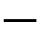

In [10]:
from IPython.display import Image, display
display(Image(filename='img_out/Noto_Sans_CJK_SC/19968.png'))

### Visualize range of code points

In [11]:
vg.visualize_range(start='\u4e05', end='\u4e09')

Visualizing 5 total code points from 丅 to 三.
Now writing 1st code point.
Finished.
Images stored in directory /tf/img_out/Noto_Sans_CJK_SC.


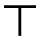

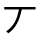

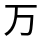

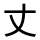

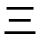

In [12]:
for i in range(ord('\u4e05'), ord('\u4e09')+1):
    display(Image(filename='img_out/Noto_Sans_CJK_SC/'+str(i)+'.png'))

## Distance Calculation

In [23]:
from distance_metrics import Distance, ImgFormat
distance = Distance(img_format=ImgFormat.RGB)

### List all image formats

In [24]:
list(ImgFormat)

[<ImgFormat.RGB: 1>,
 <ImgFormat.A8: 2>,
 <ImgFormat.A1: 3>,
 <ImgFormat.EMBEDDINGS: 4>]

### Get supported distance metrics for RGB image

In [25]:
metrics = distance.get_metrics()
metrics.keys()

dict_keys(['naive'])

### Calculate distance between two images

In [20]:
d = distance.calculate_from_path(metric=metrics['naive'], path1='img_out/Noto_Sans_CJK_SC/19973.png', 
                             path2='img_out/Noto_Sans_CJK_SC/19974.png')
print('Distance between {} and {} is {}'.format(chr(19973), chr(19974), d))

Distance between 丅 and 丆 is 22.803125000000005


In [21]:
d = distance.calculate_from_path(metric=metrics['naive'], path1='img_out/Noto_Sans_CJK_SC/19973.png', 
                             path2='img_out/Noto_Sans_CJK_SC/19976.png')
print('Distance between {} and {} is {}'.format(chr(19973), chr(19976), d))

Distance between 丅 and 丈 is 44.99
